In [1]:
# We load the DataFrame.
from sodapy import Socrata
import pandas as pd

client = Socrata("analisi.transparenciacatalunya.cat", None)

result = client.get("q2sg-894k", limit=150000)

data = pd.DataFrame.from_records(result)
data

,data,any,duradasegons,diasetmana,mes,hora,llengua,comarca,ambitterritorial,provincia,...,xarxa_b,derivacio_c,xarxa_c,emergencia,detallprofessional,relacioagressorambitlaboral,traduccio,idiomatraduccio,situaciofillsfilles_a,nombrefillsfilles_a
0,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T01:00:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T06:33:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T11:57:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01T00:00:00.000,2013,Entre 15 i 30 minuts,Dimarts,Gener,1899-12-31T21:52:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T01:06:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106361,2021-10-31T00:00:00.000,2021,Entre 5 i 15 minuts,Diumenge,Octubre,15:15:32,Català,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
106362,2021-10-31T00:00:00.000,2021,Entre 5 i 15 minuts,Diumenge,Octubre,16:18:46,Castellà,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
106363,2021-10-31T00:00:00.000,2021,Entre 5 i 15 minuts,Diumenge,Octubre,16:33:54,Castellà,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
106364,2021-10-31T00:00:00.000,2021,Més de 30 minuts,Diumenge,Octubre,17:14:04,Català,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# We import everything we need
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as ani

In [12]:
%matplotlib qt

# ANIMATION PIE CHART OF THE AGE OF THE VICTIM
# We change the data from the DataFrame to correct the mistakes in it
data.loc[data['edat'] == 'Menors de 18 anys', 'edat'] = 'Menor de 18 anys'
data.loc[data['edat'] == 'Entre 18 i 30 anys', 'edat'] = 'Entre 18 i 31 anys'
data.loc[data['relacioagressor'] == 'Fill / fills', 'relacioagressor'] = 'Fill/fills'
data.loc[data['relacioagressor'] == 'Germà / germans', 'relacioagressor'] = 'Germà/germans'

# Prepare canvas
# We choose the color palette
cmap = cm.get_cmap('PuRd')
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
title = 'Age of the victim'
fig1.suptitle(title)
# Pick color according to age range
colors = [cmap(int(257*i/(7-1))) for i in range(7)]

# We make a list with the years
z = data['any'].value_counts().sort_index()
anys = z.index

# We change the labels to english
labels = [
    'Between  18 and 31 years old',
    'Between  31 and 40 years old',
    'Between  41 and 50 years old',
    'Between  51 and 60 years old',
    'Under 18 years old','Over 60 years old',
    'Unknown'
]

# We prepare the form of the pie chart
# We make the pie-chart donut explode
explode = []
for j in range(7):
    explode.append(0.01)

def getmepieage(i):
    """
    Plots a donut shaped pie chart of
    the age ranges
    """
    ax1.clear()
#   Count reported gender violence per age range per year, and we sort it
#   in order
    edat = data.loc[data['any'] ==anys[i], 'edat'].value_counts().sort_index()
#   Mean of reported violence in an age range over all age ranges
    values = edat.values / edat.values.sum()
#   We plot the pie-chart
    ax1.pie(
        x=values,
        labels=labels,
        colors=colors,
        normalize=True, explode=explode, shadow=None, autopct='%1.1f%%',
        textprops=dict(color="black"), rotatelabels=0,
        labeldistance=1.1, pctdistance=0.5
    )
#   We change the title by year
    ax1.set_title('Year: ' + anys[i], fontsize=12)
#   We plot the donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig1 = plt.gcf()
    fig1.gca().add_artist(centre_circle)
    fig1.tight_layout()

# We plot and save the animation
animatorage = ani.FuncAnimation(fig1, getmepieage, interval=1000, frames=len(anys), repeat=True)
plt.show()
# Writer = ani.writers['ffmpeg']
# writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)
# animatorage.save('edatvictima.mp4', writer=writer)

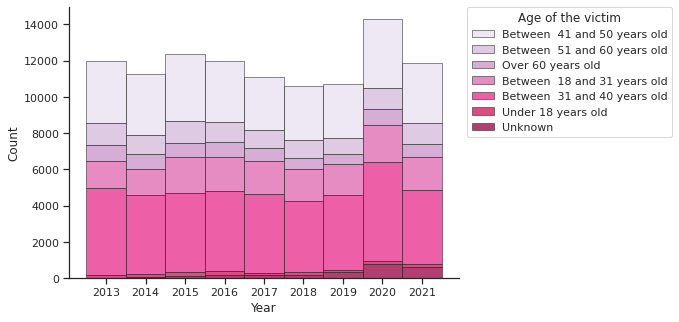

In [4]:
%matplotlib inline

import seaborn as sns
import matplotlib as mpl

# HISTOGRAM OF THE VICTIMS AGE
# We prepare the canvas
sns.set_theme(style="ticks")
# We redifine the labels for the legend
labels = [
    'Between  41 and 50 years old',
    'Between  51 and 60 years old',
    'Over 60 years old',
    'Between  18 and 31 years old',
    'Between  31 and 40 years old',
    'Under 18 years old',
    'Unknown'
]

f1, axs1 = plt.subplots(figsize=(7, 5))
sns.despine(f1)

# We plot the histogram
g = sns.histplot(
    data,
    x="any", hue="edat",
    multiple="stack",
    palette="PuRd",
    edgecolor=".1",
    linewidth=.5,
    log_scale=False,
)

# We define a function to move the legend outside the plot
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    ax.set_xlabel('Year')
    ax.legend(handles, labels, loc=new_loc, title=title, **kws, bbox_to_anchor=(1.02, 1), borderaxespad=0)

# We move the legend
move_legend(axs1, "best")

In [5]:
%matplotlib qt

# ANIMATION PIE CHART OF THE GENDER OF THE VICTIM
# Prepare canvas
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
title = 'Sex of the victim'
fig2.suptitle(title)
# Pick color according to age range
colors = [cmap(int(257*i/(3-1))) for i in range(3)]

# We choose the column of the DataFrame we want to plot
columna = 'sexe'

# We change the labels to english
labelenglish = ['Women', 'Men', 'Others']

# We prepare the form of the pie chart
def getmepiesex(i):
    ax2.clear()
#   Count reported gender violence per gender per year
    gene = data.loc[data['any'] == anys[i], columna].value_counts()
#   Mean of reported violence per gender over all genders
    values = gene.values / gene.values.sum()
#   We put the correct labels
    label = []
    for j in range(len(values)):
        label.append(labelenglish[j])
#   We make the pie-chart donut explode
    explode = []
    for k in range(len(values)):
        explode.append(0.001)
#   We plot the pie-chart
    ax2.pie(
        x=values[:],
        labels=label[:],
        colors=colors[:],
        normalize=True, explode=explode, shadow=None,
        autopct='%1.2f%%',
        textprops=dict(color="black"), rotatelabels=0,
        labeldistance=1.1, pctdistance=0.5
    )
#   We plot the donut
    ax2.set_title('Year: ' + anys[i], fontsize=12)
#   We plot the donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig2 = plt.gcf()
    fig2.gca().add_artist(centre_circle)
# We animate it
animatorsex = ani.FuncAnimation(
    fig2,
    getmepiesex,
    interval=1000,
    frames=len(anys),
    repeat=False
)
plt.show()
# animatorsex.save('sexvictim.mp4', writer=writer)

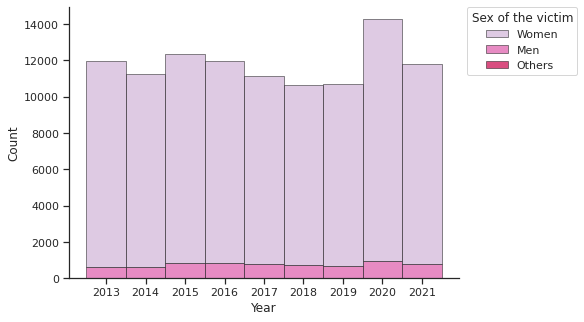

In [6]:
%matplotlib inline

# HISTOGRAM OF THE SEX OF THE VICTIM
sns.set_theme(style="ticks")
# We redifien the labels
labels = ['Women', 'Men', 'Others']

# We prepare the canvas
f2, axs2 = plt.subplots(figsize=(7, 5))
sns.despine(f2)
# We plot the histogram
g = sns.histplot(
    data,
    x="any", hue="sexe",
    multiple="stack",
    palette="PuRd",
    edgecolor=".1",
    linewidth=.5,
    log_scale=False,
)

# Move the legend outside the plot
move_legend(axs2, "best")

In [7]:
%matplotlib qt

# ANIMATION PIE CHART OF THE CIVIL STATUS OF THE VICTIM
# Prepare canvas
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
title = 'Civil status of the victim'
fig3.suptitle(title)

# We choose the column of the DataFrame we want to plot
columna = 'estatcivil'

# We change the labels to english
labels = ['Married', 'Divorced', 'Unknown', 'De facto couple', 'Separated', 'Single', 'Widow']
# Pick color according to age range
colors = [cmap(int(257*i/(len(labels)-1))) for i in range(len(labels))]

# We make the pie-chart donut explode
explode = []
for j in range(len(labels)):
    explode.append(0.01)

def getmepiestate(i):
    ax3.clear()
#   Count reported gender violence per civil state per year
    gene = data.loc[data['any'] == anys[i], columna].value_counts().sort_index()
#   Mean of reported violence per civil state over all civil states
    values = gene.values / gene.values.sum()

#   We plot the pie-chart
    ax3.pie(
        x=values[:],
        labels=labels[:],
        colors=colors[:],
        normalize=True, explode=explode, shadow=None,
        autopct='%1.1f%%',
        textprops=dict(color="black"), rotatelabels=0,
        labeldistance=1.1, pctdistance=0.5
    )
#   We plot the donut
    ax3.set_title('Year: ' + anys[i], fontsize=12)
#   We plot the donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig3 = plt.gcf()
    fig3.gca().add_artist(centre_circle)
# We plot the animation
animatorcivil = ani.FuncAnimation(fig3, getmepiestate, interval=1000, frames=len(anys), repeat=True)
plt.show()
# animatorcivil.save('estatcivil.mp4', writer=writer)

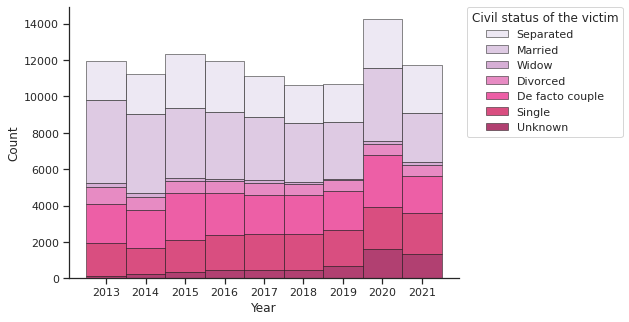

In [8]:
%matplotlib inline

# HISTOGRAM OF THE CIVIL STATUS OF THE VICTIM
sns.set_theme(style="ticks")
# We set the canvas
f3, axs3 = plt.subplots(figsize=(7, 5))
sns.despine(f3)
# Redifining labels
labels = ['Separated', 'Married', 'Widow', 'Divorced', 'De facto couple', 'Single', 'Unknown']
# We plot the histogram
g = sns.histplot(
    data,
    x="any", hue="estatcivil",
    multiple="stack",
    palette="PuRd",
    edgecolor=".1",
    linewidth=.5,
    log_scale=False,
)
# We move the legend
move_legend(axs3, "best")

In [10]:
%matplotlib qt

# ANIMATION PIE CHART OF THE RELATIONSHIP BETWEEN THE VICTIM AND THE AGRESSOR
# We couple together all familiar relations
datapetit = data.copy()
datapetit = datapetit[['relacioagressor', 'any']]

datapetit.loc[datapetit['relacioagressor'] == 'Fill/fills', 'relacioagressor'] = 'Familiar'
datapetit.loc[datapetit['relacioagressor'] == 'Germà/germans', 'relacioagressor'] = 'Familiar'
datapetit.loc[datapetit['relacioagressor'] == 'Pare', 'relacioagressor'] = 'Familiar'
datapetit.loc[datapetit['relacioagressor'] == 'Altres familiars', 'relacioagressor'] = 'Familiar'

# We choose the column of the DataFrame we want to plot
columna = 'relacioagressor'

labels = ['Former partner', 'Family', 'Partner']

# We make the donut explode
explode = []
for j in range(len(labels)):
    explode.append(0.01)

# We prepare the canvas
fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
title = 'Relationship with the agressor'
fig4.suptitle(title)
# We pick the colors
colors = [cmap(int(257*i/(len(labels)-1))) for i in range(len(labels))]

def getmepierel(i):
    ax4.clear()
#   Count reported gender violence per relationship with the agressor per year
    gene = datapetit.loc[datapetit['any'] == anys[i], columna].value_counts().sort_index()
#   Mean of reported violence per tipe of relationship
    values = gene.values / gene.values.sum()
#   We plot the pie-chart
    ax4.pie(
        x=values[:],
        labels=labels[:],
        colors=colors[:],
        normalize=True, explode=explode, shadow=None,
        autopct='%1.1f%%',
        textprops=dict(color="black"), rotatelabels=0,
        labeldistance=1.1, pctdistance=0.5
    )
#   We plot the donut
    ax4.set_title('Year: ' + anys[i], fontsize=12)
#   We plot the donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig4 = plt.gcf()
    fig4.gca().add_artist(centre_circle)

# We animate and save the plot
animatorrel = ani.FuncAnimation(fig4, getmepierel, interval=1000, frames=len(anys), repeat=True)
plt.show()
# animatorrel.save('relacioagressor.mp4', writer=writer)

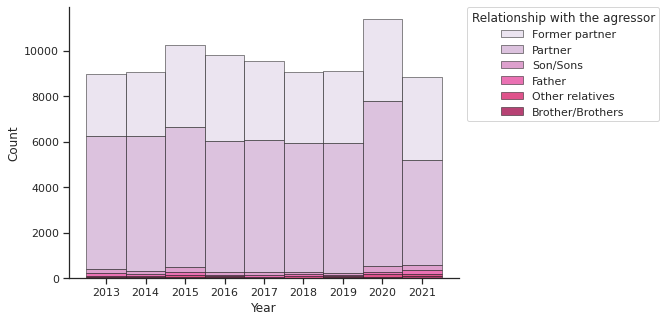

In [11]:
%matplotlib inline

# We redifine the labels to include the different familiar relations
labels = ['Former partner', 'Partner', 'Son/Sons', 'Father', 'Other relatives', 'Brother/Brothers']

# Histogram
sns.set_theme(style="ticks")

f4, axs4 = plt.subplots(figsize=(7, 5))
sns.despine(f4)

g = sns.histplot(
    data,
    x="any", hue="relacioagressor",
    multiple="stack",
    palette="PuRd",
    edgecolor=".1",
    linewidth=.5,
    log_scale=False,
)

move_legend(axs4, "best")